In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import seaborn as sns
import pandas as pd


In [16]:
datadir = "data/nonlinear"

# names of dataframes to include
names = [
    "baseline",
    "ewc",
    "subspace_estimation_vary_range",
    "subspace_estimation_vary_null",
]

# which variable (if any) to use as the hue
cs = {
    "ewc": "ewc_lambda",
    "subspace_estimation_vary_range": "knob_range",
    "subspace_estimation_vary_null": "knob_null",
}

# style settings per dataframe
plot_opts_per_df = {
    "baseline": {
        "color": "white",
        "edgecolor": "black",
        "marker": "*",
        "s": 300,
        "label": "baseline",
    },
    "ewc": {
        "cmap": "Greens",
        "norm": LogNorm(),
        "edgecolor": "black",
        "marker": "o",
        "s": 75,
        "label": "ewc",
    },
    "subspace_estimation_vary_range": {
        "cmap": "Reds",
        "edgecolor": "black",
        "marker": "s",
        "s": 75,
        "label": r"range weight $\alpha$",
    },
    "subspace_estimation_vary_null": {
        "cmap": "Blues",
        "edgecolor": "black",
        "marker": "^",
        "s": 75,
        "label": r"null space weight $\beta$",
    },
}

# potentially reorder legend entries
legend_order = None


In [17]:
# load all dataframes in datadir
df_list = []
for name in names:
    filename = os.path.join(datadir, f"{name}.csv")
    df = pd.read_csv(filename)
    # switch on names: for ewc, group by and mean per ewc_lambda, for baseline take mean over all
    # for subspace_estimation_vary_range, group by and mean per knob_range
    # for subspace_estimation_vary_null, group by and mean per knob_null
    if name == "ewc":
        df = df.groupby(cs[name]).mean(numeric_only=True).reset_index()
    elif name == "baseline":
        df = df.mean(numeric_only=True).to_frame().T
    elif name == "subspace_estimation_vary_range":
        df = df.groupby(cs[name]).mean(numeric_only=True).reset_index()
    elif name == "subspace_estimation_vary_null":
        df = df.groupby(cs[name]).mean(numeric_only=True).reset_index()
    df_list.append(df)

baseline
{'color': 'white', 'edgecolor': 'black', 'marker': '*', 's': 300, 'label': 'baseline'}
ewc
{'cmap': 'Greens', 'norm': <matplotlib.colors.LogNorm object at 0x16629a9b0>, 'edgecolor': 'black', 'marker': 'o', 's': 75, 'label': 'ewc'}
subspace_estimation_vary_range
{'cmap': 'Reds', 'edgecolor': 'black', 'marker': 's', 's': 75, 'label': 'range weight $\\alpha$'}
subspace_estimation_vary_null
{'cmap': 'Blues', 'edgecolor': 'black', 'marker': '^', 's': 75, 'label': 'null space weight $\\beta$'}


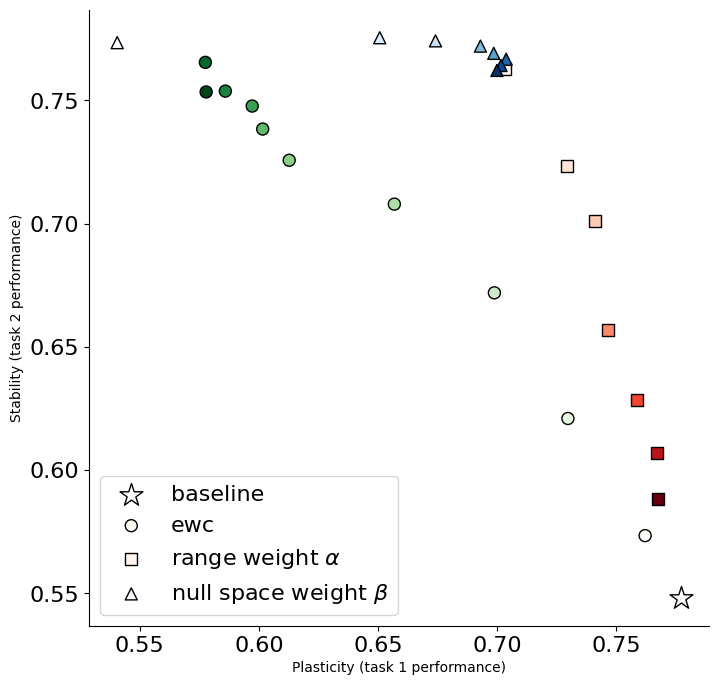

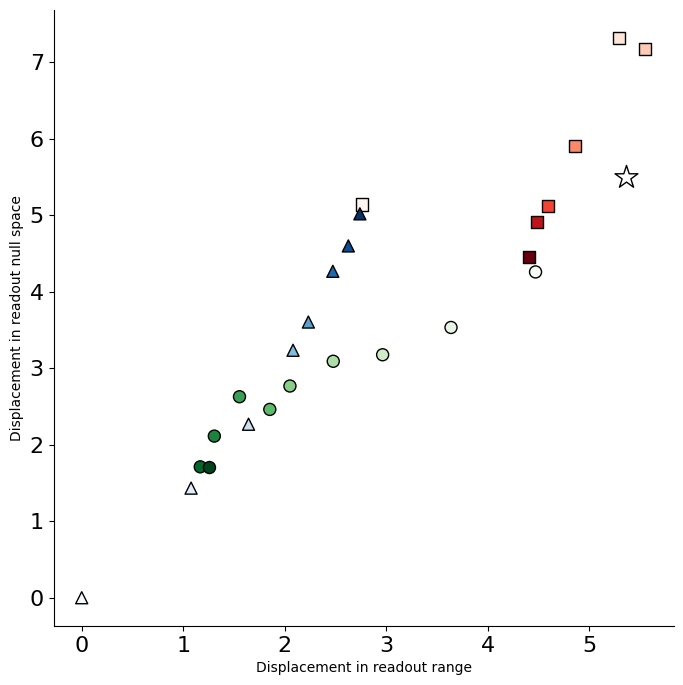

In [18]:
fig_perf = plt.figure(figsize=(8, 8))
for df, name in zip(df_list, names):
    print(name)
    if name in plot_opts_per_df.keys():
        plot_opts = plot_opts_per_df[name]
        print(plot_opts)
    else:
        plot_opts = {}
    if name in cs.keys():
        plot_opts["c"] = df[cs[name]]
    plt.scatter(df["acc_after_t1_t1"], df["acc_after_t1_t0"], **plot_opts)

plt.xlabel("Plasticity (task 1 performance)")
plt.ylabel("Stability (task 2 performance)")
sns.despine()
plt.legend(fontsize=16, loc="lower left")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

if legend_order is not None:
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(
        [handles[idx] for idx in legend_order], [labels[idx] for idx in legend_order]
    )

# plot mean_distance_null vs mean_distance_range
fig_displace = plt.figure(figsize=(8, 8))
for df, name in zip(df_list, names):
    if name in plot_opts_per_df.keys():
        plot_opts = plot_opts_per_df[name]
    else:
        plot_opts = {}
    if name in cs.keys():
        plot_opts["c"] = df[cs[name]]
    plt.scatter(df["mean_distance_range"], df["mean_distance_null"], **plot_opts)
plt.xlabel("Displacement in readout range")
plt.ylabel("Displacement in readout null space")
sns.despine()
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# we only need the legend in one panel, reenable if needed
# plt.legend(fontsize=16)

if legend_order is not None:
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(
        [handles[idx] for idx in legend_order], [labels[idx] for idx in legend_order]
    )

In [19]:
# save both
figdir = "plots/nonlinear"
# ensure exists
if not os.path.exists(figdir):
    os.makedirs(figdir)
fig_perf.savefig(os.path.join(figdir, "perf.png"))
fig_displace.savefig(os.path.join(figdir, "displace.png"))